In [13]:
# goal: reproduce figure 5 from dean's artiphysiology paper
import numpy as np
import torch
import xarray as xr
from torchvision import datasets, models, transforms
from scipy.stats import kurtosis
from util.net_response_functions import *
from util.visualization_functions import *

# params
layer_name = "conv8"

In [14]:
# import apc fits
apc_fits = np.load(f"./data/apc_fit/vgg16_{layer_name}_apc_fits.npy",
                  allow_pickle=True)

# import apc models
apc_models = xr.open_dataset("./data/apc_fit/apc_models_362_16x16.nc")

# import actual responses
outputs_tt = torch.load(f"./data/net_responses/vgg16_{layer_name}_output.pt")

In [16]:
# want n units with highest correlation that pass kurtosis filter    
selective_units = get_n_most_selective_units(10, apc_fits, apc_models, outputs_tt)
print(selective_units)

[[3.57000000e+02 6.35240000e+04 7.37493209e-01]
 [2.27000000e+02 6.32850000e+04 7.03428490e-01]
 [1.13000000e+02 6.42930000e+04 6.74343812e-01]
 [2.75000000e+02 6.35280000e+04 6.52462222e-01]
 [3.12000000e+02 6.37810000e+04 6.48254070e-01]
 [4.91000000e+02 6.37790000e+04 6.38199178e-01]
 [3.19000000e+02 6.32660000e+04 6.32044106e-01]
 [5.01000000e+02 6.22440000e+04 6.29280502e-01]
 [3.76000000e+02 2.12800000e+03 6.26140916e-01]
 [1.51000000e+02 6.37810000e+04 6.23084485e-01]]


Correlation: 0.737493208558379
Correlation: 0.7034284903580744
Correlation: 0.6743438124408705
Correlation: 0.6524622219309617
Correlation: 0.6482540703992916
Correlation: 0.6381991775196857
Correlation: 0.6320441060925469
Correlation: 0.6292805015889998


/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(25, 4))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, figsize=(5, 5))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) ar

Correlation: 0.6261409157797502


/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, figsize=(5, 5))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(25, 4))


Correlation: 0.6230844846054625


/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, figsize=(5, 5))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(25, 4))


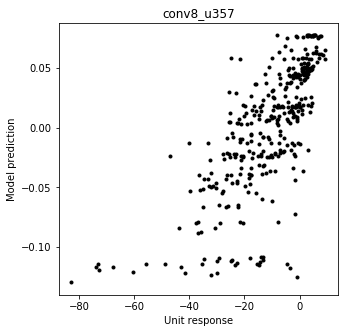

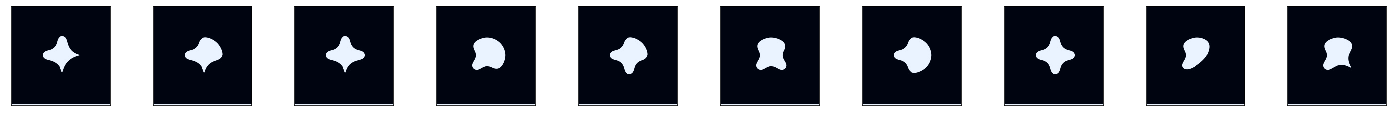

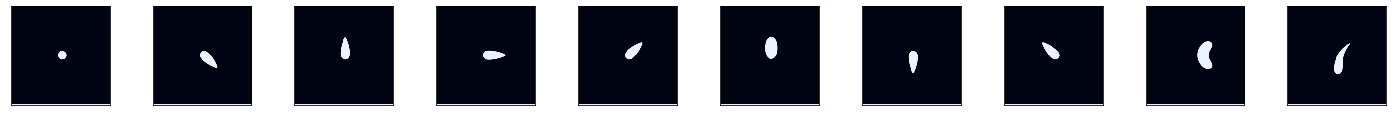

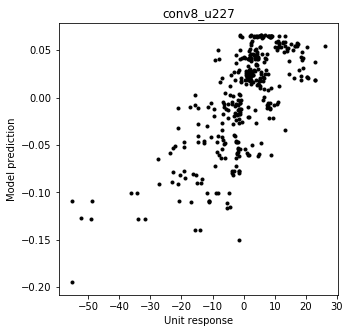

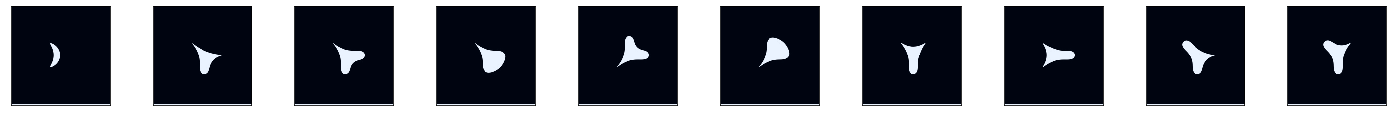

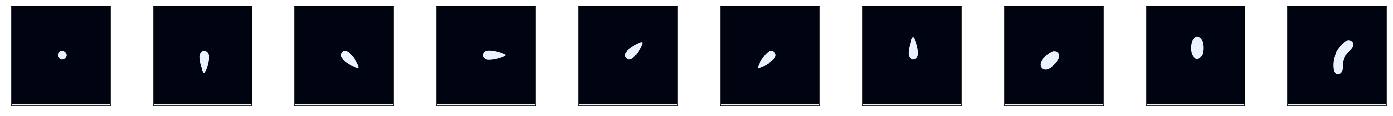

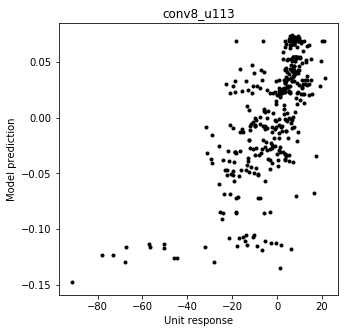

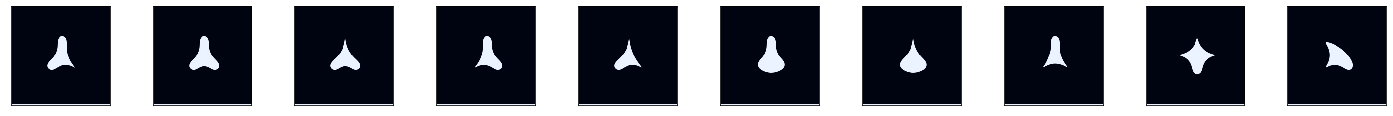

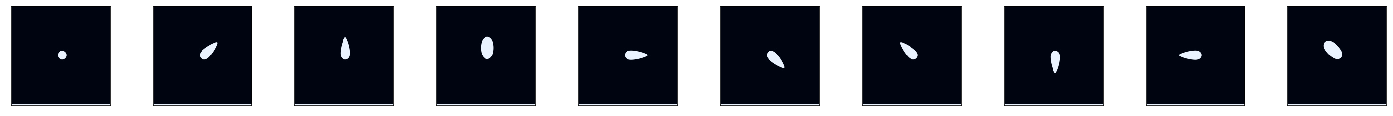

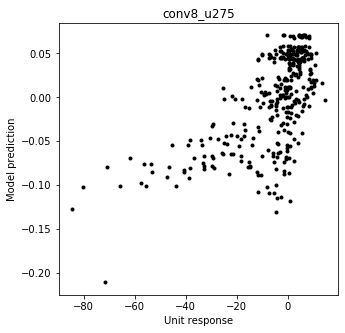

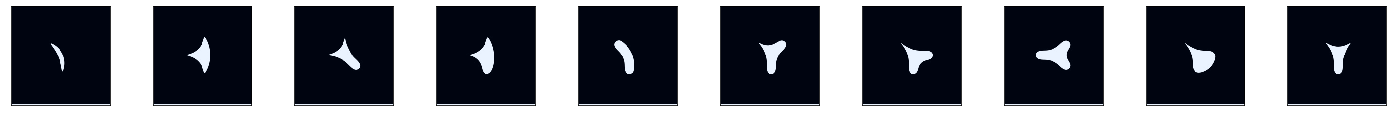

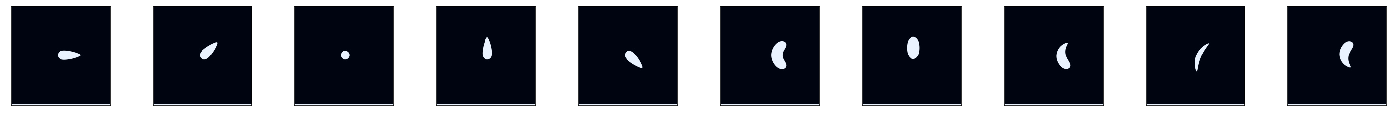

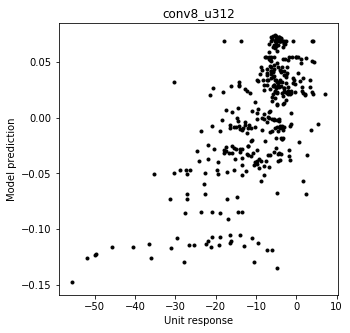

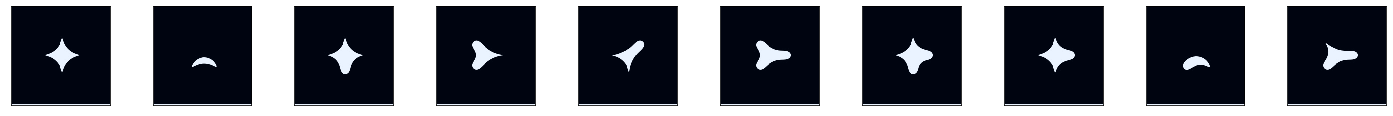

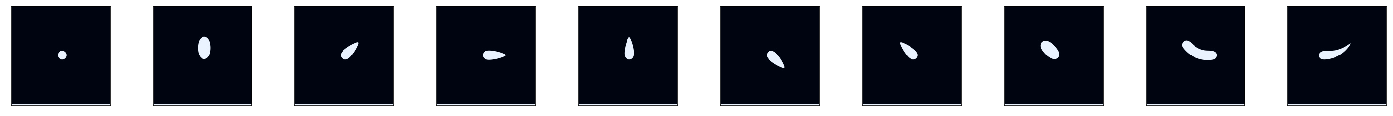

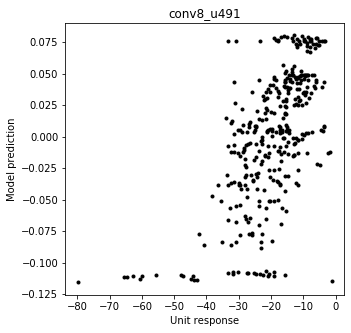

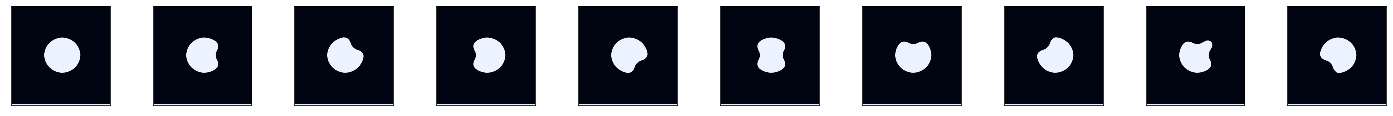

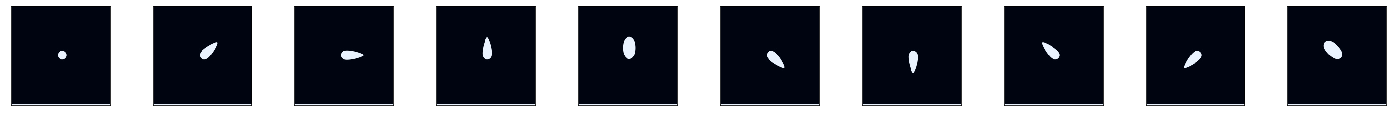

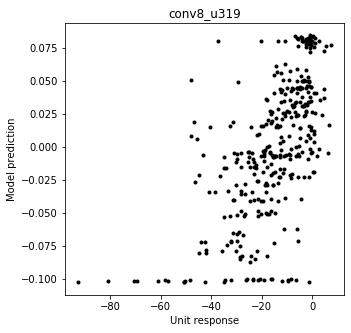

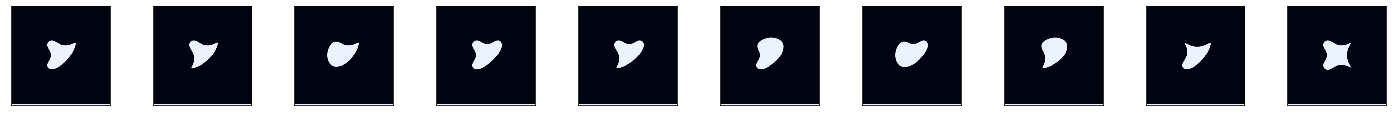

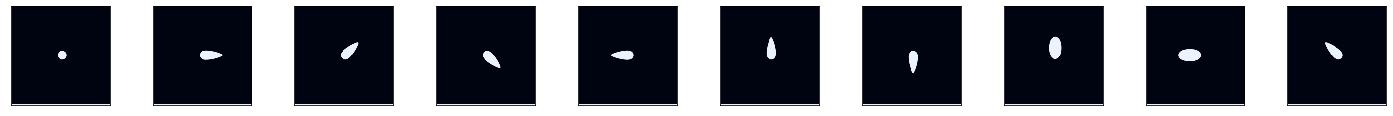

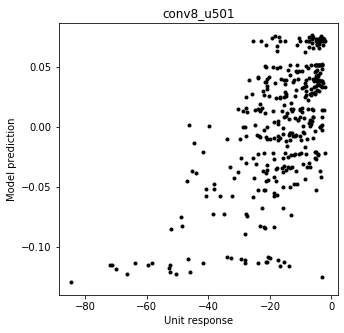

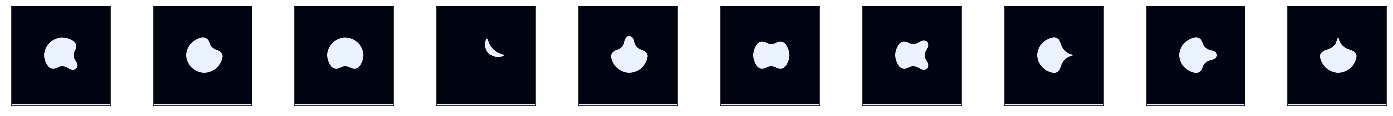

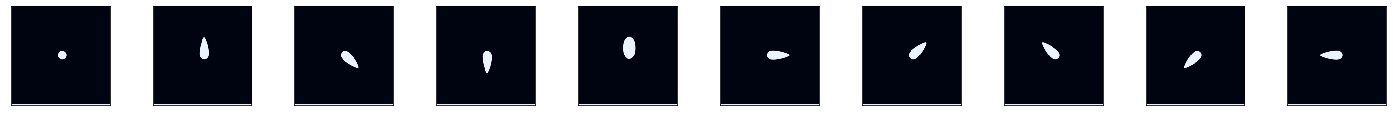

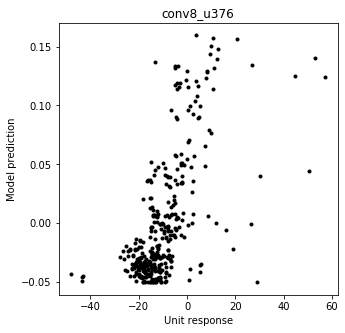

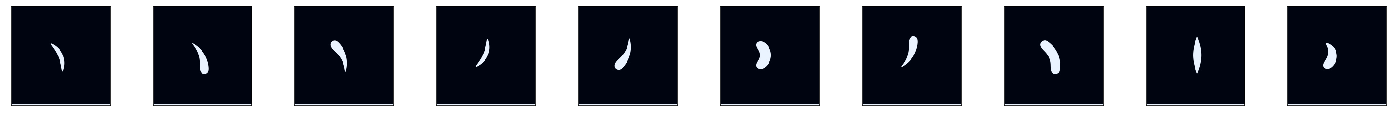

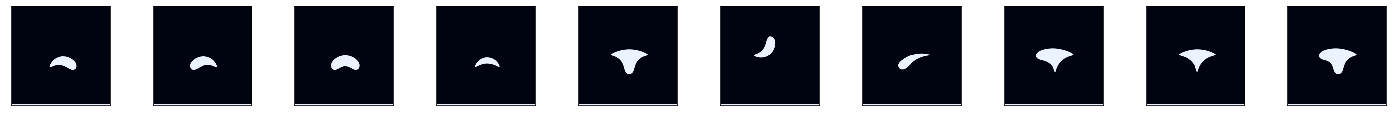

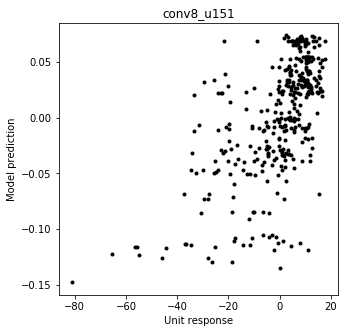

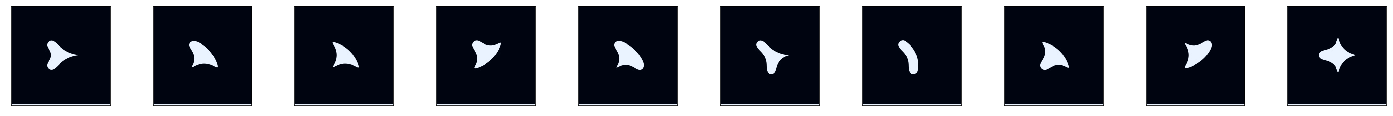

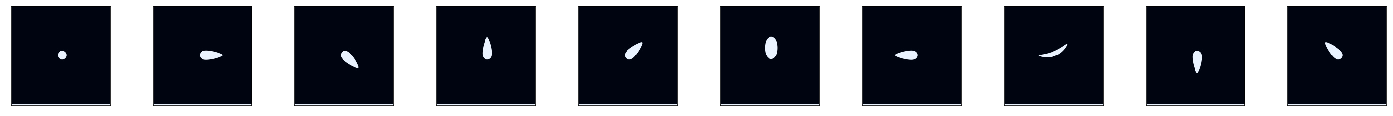

In [17]:
for (i_unit, i_model, corr) in selective_units:
    i_unit = int(i_unit)
    plot_apc_fits_for_unit(layer_name, i_unit, apc_fits, apc_models, 
                       outputs_tt, save_fig=False)
    display_top_and_bottom(unit=i_unit, n=10, outputs_tt=outputs_tt)